# Week-3 Assignment

As a part of 4-week project-based internship in Code of league 2.0 at ACM Student Chapter, IIT Dhanbad

# Movie Recommendation System

## Types of recommendation system
 - Popularity Based 

It keeps a track of view counts for each movie/video and then lists movies based on views in descending order.

 - Content Based
 
This type of recommendation systems, takes in a movie that a user currently likes as input. Then it analyzes the contents of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user. 

 - Collaborative filtering

In other words, the recommendations get filtered based on the collaboration between similar user’s preferences.

### In this project we have made  with following methods
 - Simple Recommendation System using Correlation method
 - Content based Recommendation system using KNN
 - Using Cosine Similarity

In [32]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('white')
import pickle
import scipy.sparse as sp
from scipy.sparse.linalg import svds
import warnings
warnings.filterwarnings('ignore')
import os

## Importing Datasets

In [3]:
ratings_data=pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Check out all the movies and their respective IDs 
movie_titles = pd.read_csv('movies.csv') 
movie_titles.head() 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Exploratory Data Analysis

In [5]:
data = pd.merge(ratings_data, movie_titles, on='movieId') 
data.head() 

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
# Finding the number of null values from the dataset
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [7]:
#taking the mean of ratings
data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [8]:
#sorting by top ratings
data.groupby('title')['rating'].mean().head().sort_values(ascending=False).head()

title
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'71 (2014)                                 4.0
'Round Midnight (1986)                     3.5
Name: rating, dtype: float64

In [9]:
#counting how many people have rated the movies
data.groupby('title')['rating'].count().head().sort_values(ascending=False).head()

title
'Til There Was You (1997)                  2
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Hellboy': The Seeds of Creation (2004)    1
'71 (2014)                                 1
Name: rating, dtype: int64

In [10]:
# creating dataframe with 'rating' count values 
ratings_meancount = pd.DataFrame(data.groupby('title')['rating'].mean()) 

ratings_meancount['ratings_count'] = pd.DataFrame(data.groupby('title')['rating'].count()) 

ratings_meancount.head() 

,rating,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


### Data Visualization

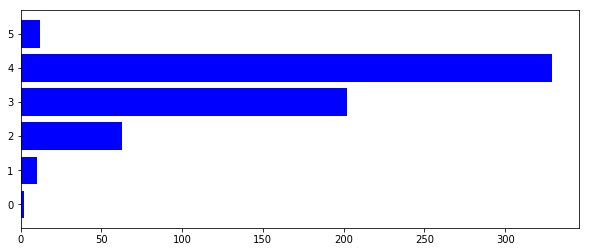

In [11]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(ratings_meancount['rating'].round(),ratings_meancount['ratings_count'],color='b')
plt.show()

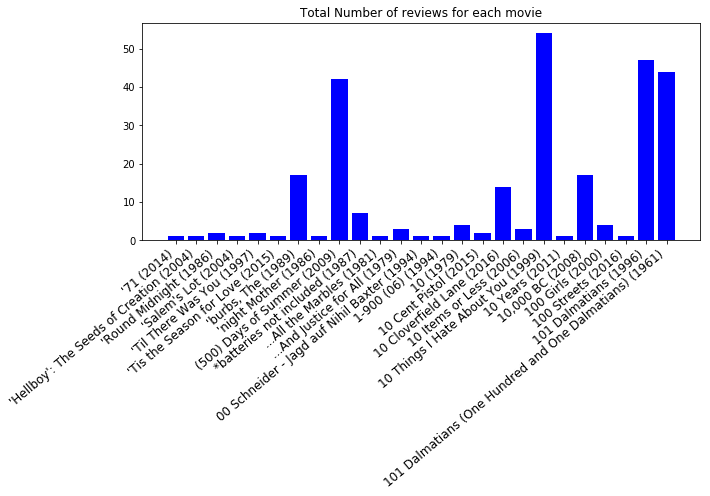

In [12]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(ratings_meancount.head(25).index,ratings_meancount['ratings_count'].head(25),color='b')
ax.set_xticklabels(ratings_meancount.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

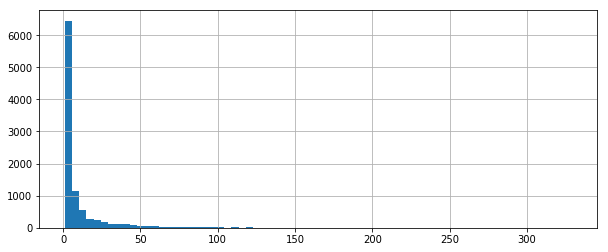

In [13]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 

ratings_meancount['ratings_count'].hist(bins = 70) 


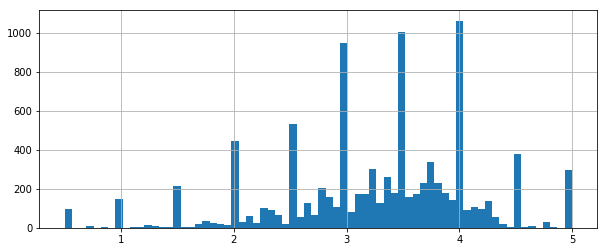

In [14]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 

ratings_meancount['rating'].hist(bins = 70) 


In [15]:
# Sorting values according to the 'ratings_count column' 
moviemat = data.pivot_table(index ='userId', 
              columns ='title', values ='rating') 
  
moviemat.head() 
  
ratings_meancount.sort_values('ratings_count', ascending = False).head(10) 


,rating,ratings_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [16]:
#Calculating mean rating of all movies and check the popular high rating movies
ratings_meancount.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

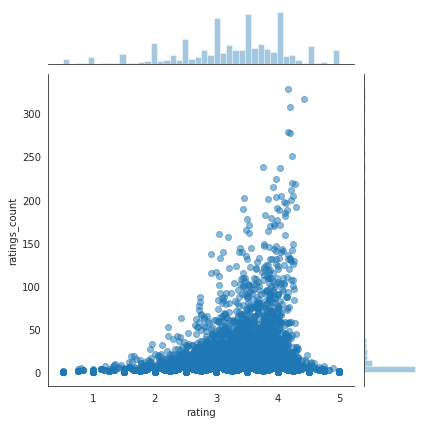

In [23]:
#plotting the joint plot, combination of scatter plot and histogram
sns.jointplot(x='rating',y='ratings_count',data=ratings_meancount,alpha=0.5)

# 1. Simple Recommendation System 

## Based on user ratings using correlation method

Creating a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [28]:
moviematt = data.pivot_table(index='userId',columns='title',values='rating')
moviematt.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings_meancount.sort_values('ratings_count',ascending=False).head(10)

,rating,ratings_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [30]:
ratings_meancount.head()

,rating,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Grabbing the user ratings for those two movies:

In [34]:
Forrest_user_ratings = moviemat['Forrest Gump (1994)']
Braveheart_user_ratings = moviemat['Braveheart (1995)']
Braveheart_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Braveheart (1995), dtype: float64

In [35]:
Forrest_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

Use the corrwith() method to get correlations between two pandas series:

In [36]:
similar_to_Braveheart = moviematt.corrwith(Braveheart_user_ratings)
similar_to_Forrest = moviematt.corrwith(Forrest_user_ratings)

cleaning this by removing NaN values and using a DataFrame instead of a series:

In [38]:
corr_Forrest = pd.DataFrame(similar_to_Forrest,columns=['Correlation'])
corr_Forrest.dropna(inplace=True)
corr_Forrest.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched Forrest Gump (it was the most popular movie). 

In [39]:
corr_Forrest.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0
"Century of the Self, The (2002)",1.0
Welcome to the Jungle (2013),1.0


Here let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier)

In [42]:
corr_Forrest = corr_Forrest.join(ratings_meancount['ratings_count'])
corr_Forrest.head()

,Correlation,ratings_count
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


Now we sort the values and notice how the titles make a lot more sense

In [43]:
corr_Forrest[corr_Forrest['ratings_count']>100].sort_values('Correlation',ascending=False).head()

,Correlation,ratings_count
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


Now the do same for Braveheart movie

In [46]:
corr_Braveheart = pd.DataFrame(similar_to_Braveheart,columns=['Correlation'])
corr_Braveheart.dropna(inplace=True)
corr_Braveheart = corr_Braveheart.join(ratings_meancount['ratings_count'])
corr_Braveheart[corr_Braveheart['ratings_count']>100].sort_values('Correlation',ascending=False).head()

,Correlation,ratings_count
title,,
Braveheart (1995),1.000000,237
Batman Begins (2005),0.610550,116
Ocean's Eleven (2001),0.575751,119
Inception (2010),0.555414,143
"Matrix, The (1999)",0.496045,278


### NOTE: Here we have checked for two movies using correlation method, same we can do for other movies

# 2. Content Based Filtering using KNN 

In [43]:
df1=pd.read_csv('movies.csv')
df2=pd.read_csv('ratings.csv')
df3=pd.read_csv('links.csv')
df4=pd.read_csv('tags.csv')

In [44]:
df1.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [45]:
df2.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [46]:
df3.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [47]:
df4.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [48]:
df4.drop(['timestamp'], axis=1, inplace=True)

In [49]:
a=df2['userId'].value_counts()
b=df2['userId'].value_counts()>200

In [50]:
new_users= list(a[b].index)

In [51]:
len(new_users)

133

In [52]:
df2=df2[df2['userId'].isin(new_users)]

In [53]:
df2.shape

(68284, 4)

In [54]:
rate_with_movies=df2.merge(df1, on='movieId')

In [55]:
rate_with_movies.shape

(68284, 6)

In [56]:
rate_with_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,45,1,4.0,951170182,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [57]:
movie_ratings= rate_with_movies.groupby('title')['rating'].count().reset_index()

In [58]:
movie_ratings= movie_ratings[movie_ratings['rating']>=50]

In [59]:
final_rating= rate_with_movies.merge(movie_ratings, on='title')

In [60]:
final_rating= final_rating.merge(df3, on='movieId')

In [61]:
final_rating= final_rating.merge(df4, on='movieId')

In [62]:
final_rating.shape

(76766, 11)

In [63]:
final_rating.head()

,userId_x,movieId,rating_x,timestamp,title,genres,rating_y,imdbId,tmdbId,userId_y,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,336,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,474,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,567,fun
3,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,336,pixar
4,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,474,pixar


In [67]:
final_rating= final_rating.drop_duplicates(subset=['userId_x', 'title'])

In [68]:
final_rating.shape

(11157, 11)

In [69]:
final_rating

,userId_x,movieId,rating_x,timestamp,title,genres,rating_y,imdbId,tmdbId,userId_y,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,336,pixar
3,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,336,pixar
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,336,pixar
9,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,336,pixar
12,45,1,4.0,951170182,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,92,114709,862.0,336,pixar
...,...,...,...,...,...,...,...,...,...,...,...
76761,590,1387,4.5,1258420853,Jaws (1975),Action|Horror,65,73195,578.0,474,Shark
76762,597,1387,5.0,940421389,Jaws (1975),Action|Horror,65,73195,578.0,474,Shark
76763,599,1387,3.5,1498500815,Jaws (1975),Action|Horror,65,73195,578.0,474,Shark
76764,603,1387,4.0,953925452,Jaws (1975),Action|Horror,65,73195,578.0,474,Shark


In [70]:
movie_pivot= final_rating.pivot_table(columns='userId_x', index='title', values='rating_x')

In [71]:
movie_pivot.shape

(162, 133)

In [72]:
movie_pivot.head()

userId_x,1,4,6,18,19,20,21,28,41,42,...,594,596,597,599,600,603,605,606,608,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),NaN,NaN,NaN,4.0,3.0,NaN,NaN,3.0,2.0,5.0,...,NaN,4.0,NaN,5.0,4.0,5.0,NaN,5.0,3.0,4.5
Airplane! (1980),NaN,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,5.0,...,NaN,3.5,5.0,3.5,3.5,NaN,5.0,NaN,NaN,3.5
Aladdin (1992),NaN,4.0,5.0,3.5,3.0,5.0,4.0,NaN,NaN,NaN,...,4.5,NaN,4.0,3.0,3.5,NaN,3.5,NaN,3.0,NaN
Alien (1979),4.0,NaN,NaN,4.0,4.0,NaN,1.5,3.5,0.5,NaN,...,4.0,4.0,5.0,5.0,2.5,5.0,NaN,4.0,4.0,4.5
Aliens (1986),NaN,NaN,NaN,NaN,3.0,NaN,2.0,4.0,2.0,NaN,...,NaN,3.5,5.0,5.0,2.0,4.0,NaN,3.5,4.5,5.0


In [73]:
df=movie_pivot.fillna(0)

In [74]:
df

userId_x,1,4,6,18,19,20,21,28,41,42,...,594,596,597,599,600,603,605,606,608,610
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.0,0.0,0.0,4.0,3.0,0.0,0.0,3.0,2.0,5.0,...,0.0,4.0,0.0,5.0,4.0,5.0,0.0,5.0,3.0,4.5
Airplane! (1980),0.0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,...,0.0,3.5,5.0,3.5,3.5,0.0,5.0,0.0,0.0,3.5
Aladdin (1992),0.0,4.0,5.0,3.5,3.0,5.0,4.0,0.0,0.0,0.0,...,4.5,0.0,4.0,3.0,3.5,0.0,3.5,0.0,3.0,0.0
Alien (1979),4.0,0.0,0.0,4.0,4.0,0.0,1.5,3.5,0.5,0.0,...,4.0,4.0,5.0,5.0,2.5,5.0,0.0,4.0,4.0,4.5
Aliens (1986),0.0,0.0,0.0,0.0,3.0,0.0,2.0,4.0,2.0,0.0,...,0.0,3.5,5.0,5.0,2.0,4.0,0.0,3.5,4.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
When Harry Met Sally... (1989),0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.5,4.0,...,5.0,3.5,5.0,3.0,2.5,4.0,0.0,4.5,0.0,0.0
Who Framed Roger Rabbit? (1988),5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,5.0,3.5,3.0,3.0,0.0,3.0,3.0,0.0
"Wizard of Oz, The (1939)",5.0,5.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,3.0,3.0,5.0,2.0,0.0,2.5,3.5


In [75]:
x = df.iloc[100].values
y = df.iloc[100, :].values

#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [76]:
from scipy.sparse import csr_matrix
movie_matrix= csr_matrix(movie_pivot)

In [77]:
from sklearn.neighbors import NearestNeighbors
model= NearestNeighbors(algorithm='brute')
model.fit(df)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [78]:
df.index[100]
df.iloc[100, :].values.reshape(1, -1)

array([[0. , 3. , 0. , 0. , 0. , 4. , 0. , 3.5, 4. , 4. , 0. , 0. , 0. ,
        0. , 0. , 1. , 4. , 4. , 2. , 0. , 0. , 0. , 0. , 4. , 5. , 0. ,
        0.5, 0. , 0. , 5. , 0. , 1.5, 3. , 2. , 4. , 0. , 0. , 3. , 4.5,
        4. , 4. , 0. , 4. , 4. , 0. , 3.5, 0. , 0. , 5. , 4. , 0. , 4. ,
        3.5, 0. , 0. , 0. , 0. , 4. , 4. , 0. , 4. , 5. , 0. , 0. , 0. ,
        3.5, 0. , 0. , 0. , 0. , 0. , 4.5, 0. , 5. , 0. , 0. , 0. , 0. ,
        3.5, 4. , 5. , 3. , 0. , 0. , 0. , 4. , 0. , 0. , 4. , 3. , 5. ,
        4. , 0. , 0. , 0. , 0. , 2. , 5. , 5. , 2.5, 0. , 4. , 0. , 4.5,
        0. , 0. , 2.5, 0. , 0. , 0. , 3. , 0. , 0. , 0. , 4.5, 4. , 0. ,
        0. , 0. , 0. , 4.5, 0. , 4. , 0. , 3.5, 0. , 3.5, 4. , 3. , 0. ,
        4.5, 4.5, 4.5]])

In [79]:
distance, suggestion= model.kneighbors(df.iloc[1,:].values.reshape(1, -1), n_neighbors=5)
suggestion

array([[ 1, 16, 95, 75, 17]])

In [80]:
df.index[16]

'Batman (1989)'

In [81]:
df.index[1]

'Airplane! (1980)'

In [82]:
for i in suggestion[0]:
    print(df.index[i])

Airplane! (1980)
Batman (1989)
Mission: Impossible (1996)
Jaws (1975)
Batman Forever (1995)


In [83]:
def recommend(title):
    b_id=np.where(df.index==title)[0][0]
    distance, suggestion= model.kneighbors(df.iloc[b_id, :].values.reshape(1, -1), n_neighbors=5)
    for i in suggestion[0]:
        print(df.index[i])

In [84]:
recommend('Aliens (1986)')

Aliens (1986)
Alien (1979)
Terminator 2: Judgment Day (1991)
Batman (1989)
Terminator, The (1984)


## Here we have to enter the movie name to get recommendations 

# 3. Using Cosine Similarity

In [85]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [86]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

as there is no null character there is no need of cleaning in both datasets

In [87]:
movies.shape

(9742, 3)

In [88]:
ratings.shape

(100836, 4)

In [89]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [90]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


####  From the above table we can conclude:
The average rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively. There are 668 user who has given their ratings for 149532 movies. 

collecting the list of genres and movie title available

In [91]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
                  
genres=str(genres) 

movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 


In [94]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [96]:
dfe=df.groupby(['title'])[['rating']].sum()
high_rated=dfe.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1404.0
Forrest Gump (1994),1370.0
Pulp Fiction (1994),1288.5
"Matrix, The (1999)",1165.5
"Silence of the Lambs, The (1991)",1161.0


<BarContainer object of 20 artists>

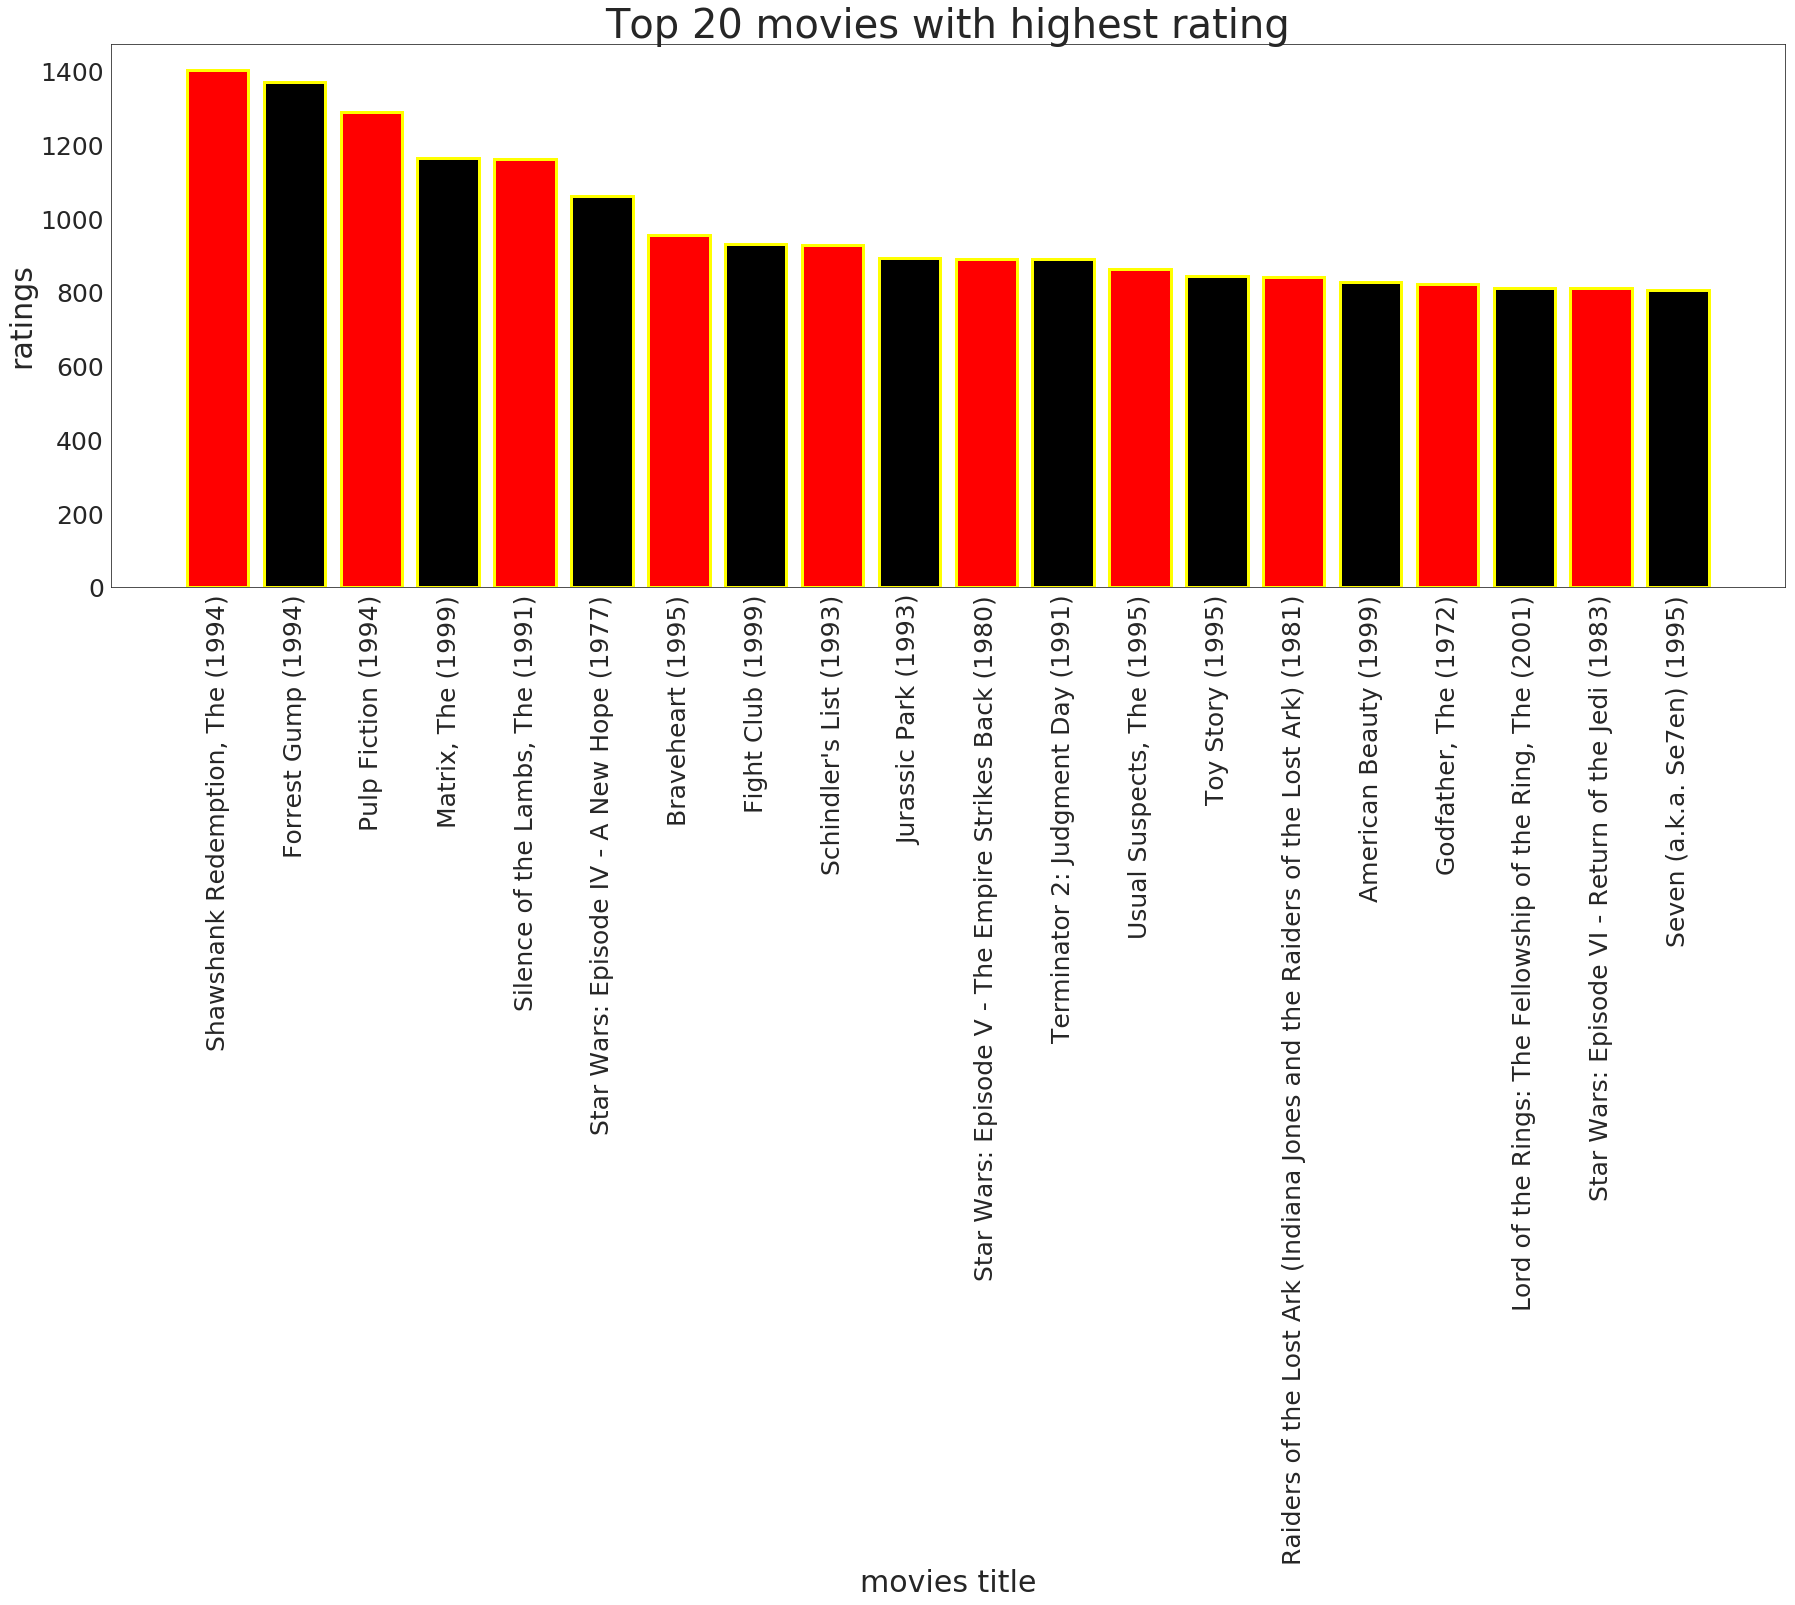

In [97]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','black','red','black','red','black','red','black','red','black']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='yellow',color=colors)

In [98]:
dfe2=df.groupby('title')[['rating']].count()
rating_count_20=dfe2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


<BarContainer object of 20 artists>

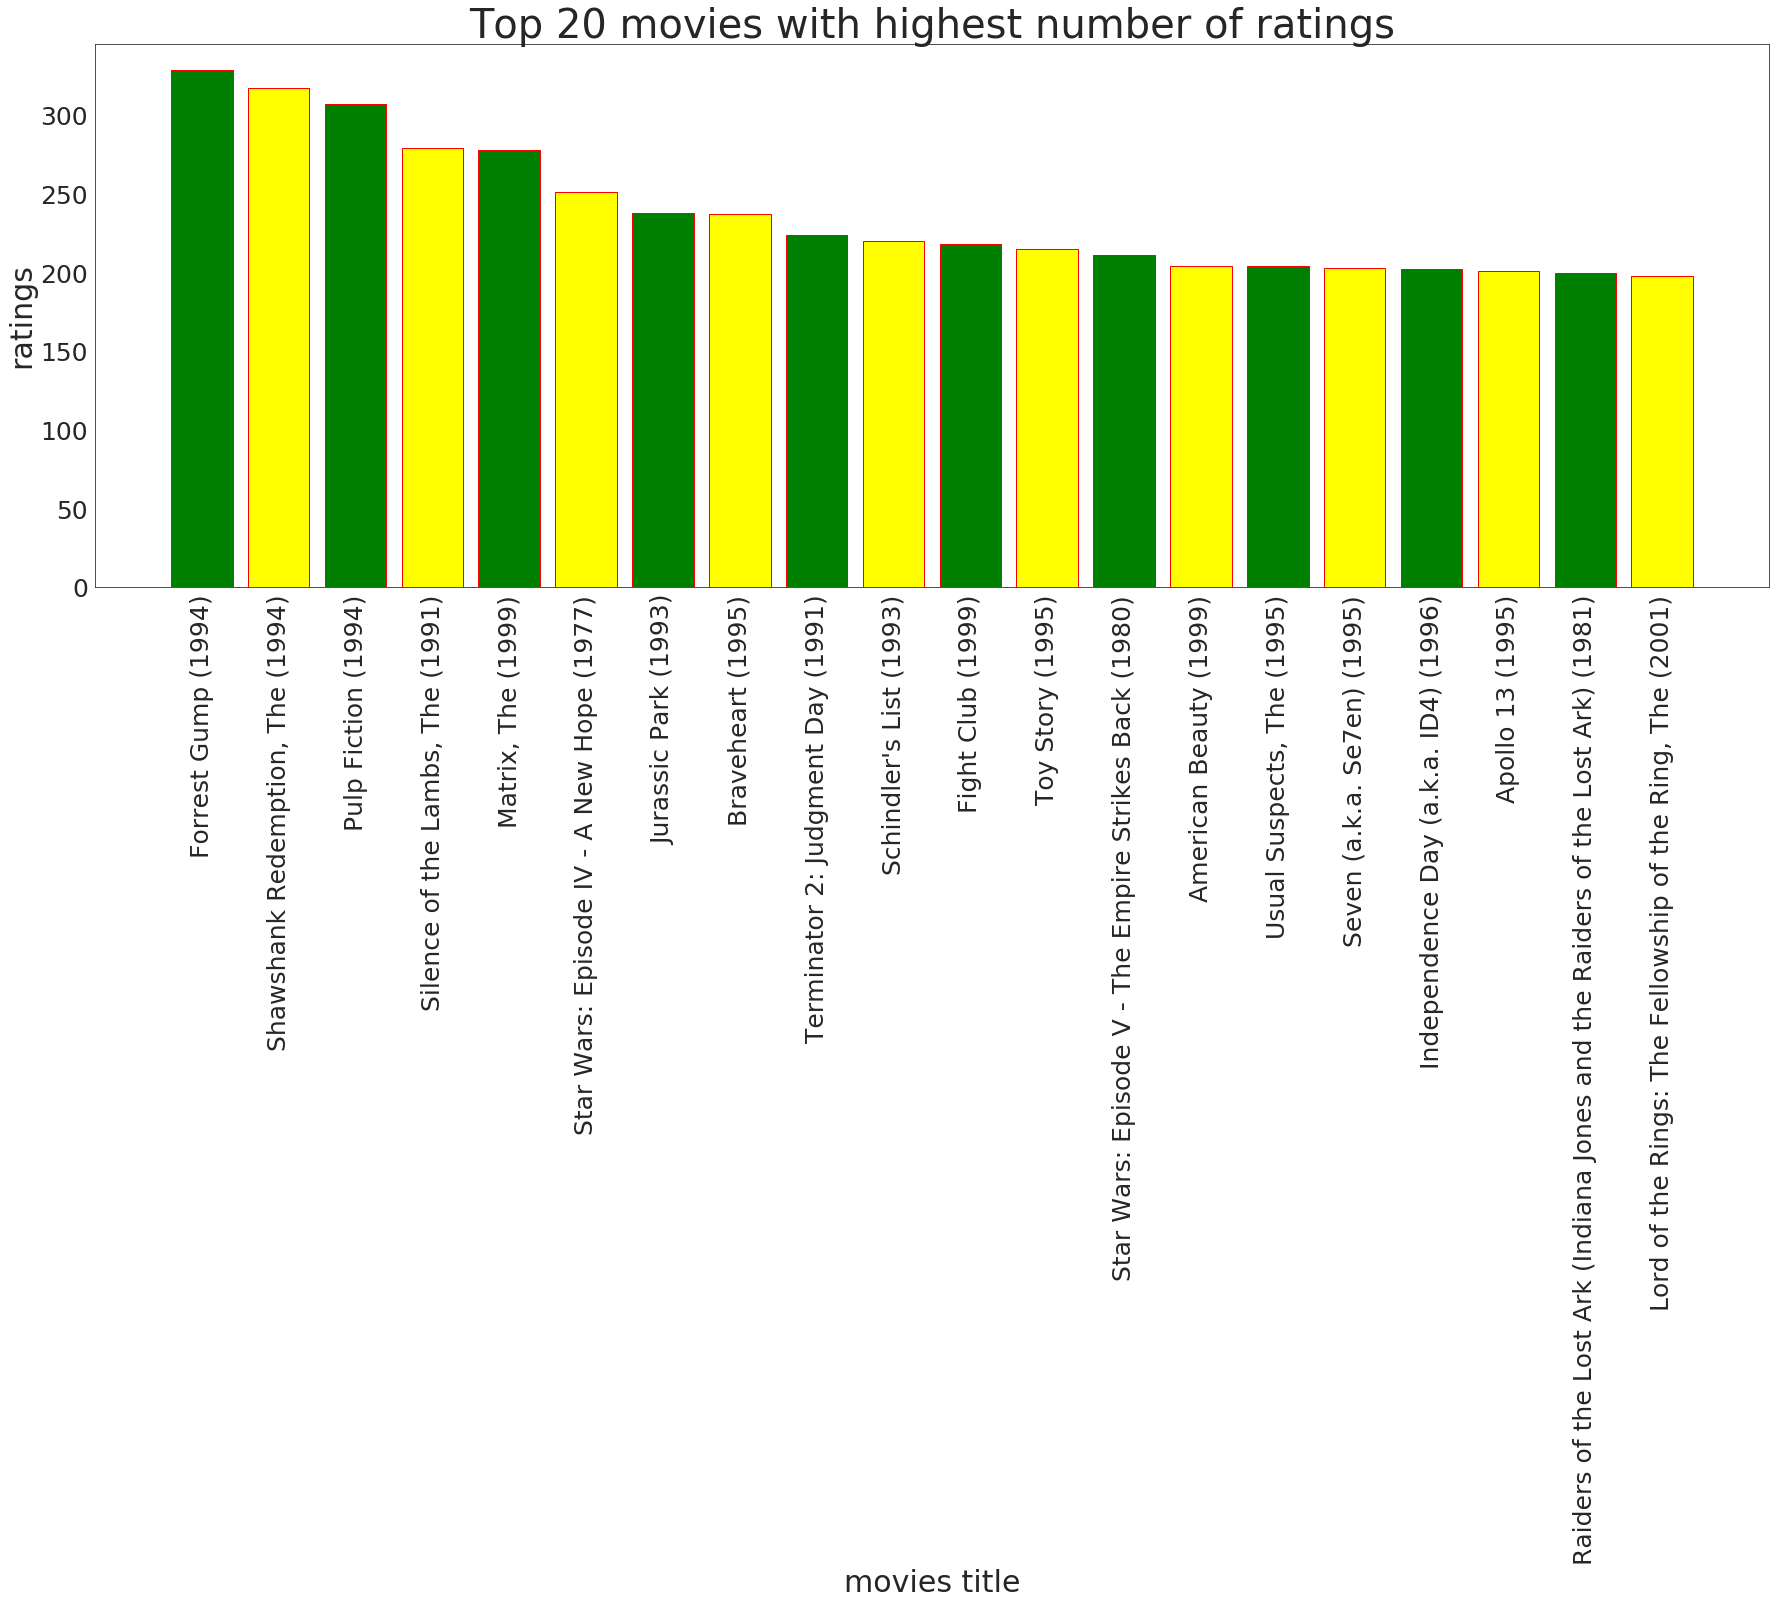

In [99]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=40)
colors=['green','yellow','green','yellow','green','yellow','green','yellow','green','yellow']
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)
plt.bar(rating_count_20.index,rating_count_20.rating,edgecolor='red',color=colors)

In [100]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [101]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Suppose a user wants to watch a movie similar to Monsters, Inc. (2001) then we can recommend the user by calculating the cosine similarity between Toy Story and other movies. So we have to first find the cosine similarity between them

In [102]:

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [103]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

We have to give input as both year and title of the movie in this model as per dataset titles

In [104]:
recommendations('Monsters, Inc. (2001)')

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
8927                             The Good Dinosaur (2015)
9430                                         Moana (2016)
8900                                    Inside Out (2015)
1505                           Black Cauldron, The (1985)
1577                        Lord of the Rings, The (1978)
2539                We're Back! A Dinosaur's Story (1993)
3230                     Atlantis: The Lost Empire (2001)
3336          

In [105]:
recommendations('Toy Story (1995)')

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
8927                             The Good Dinosaur (2015)
9430                                         Moana (2016)
8900                                    Inside Out (2015)
1505                           Black Cauldron, The (1985)
1577                        Lord of the Rings, The (1978)
2539                We're Back! A Dinosaur's Story (1993)
3230                     Atlantis: The Lost Empire (2001)
3336          

## The End